# Lecture 4.1: Likelihood

## Outline 

* Statistical inference overview
* Likelihood
* Log-likelihood
* Maximum likelihood estimation (MLE)
* Brief introduction to Bayesian statistics

## Objectives

* Know how to write out the likelihood function for a given set of data and an assumed distribution
* Understand the difference between the likelihood function and the probability function
* Know what MLE is
* Can calculate the MLE by maximizing the log-likelihood
* Have an intuitive understanding of the idea of Bayesian statistics

## Statistical Inference

Statistical inference, or "learning" as it is called in computer science, is the process of using data to infer the distribution that generated the data or the population that the data come from.

<img src="images/inference.png" width="500">

### Three Types of Inference

* Point estimation
    * Provide a single "best guess" of some quantity of interest
* Confidence intervals
    * Provide an interval estimate of some quantity of interest
* Hypothesis testing
    * Start with some default idea, and ask if the data provide sufficient evidence to reject the idea 

## Estimation Example

If we are given a coin, without knowing whether or not it is fair, how do we esitmate the true probability of getting a head when it is flipped?  

I flipped my coin 10 times, and got 8 heads. How can I estimate the probablity of success (getting a head) from the data?

Let $X$ be the number of heads we get from flipping the coin 10 times, then

$$X \sim Binomial(n = 10, p = ?)$$

In this case, the value of $X$ is known, $X  = 8$, but $p$ is unknown and we want to estimate it.

We may guess $p = 8/10 = 0.8$, but can it be $0.7$? $0.9$? $0.5$? What's the most *likely* value of $p$ for your coin?

Suppose for a moment that $p = 0.5$, what is the probability of observing $X = 8$?

When $X \sim Binomial(10, 0.5)$, 

$$ P(X = 8) = \binom{10}{8} (0.5)^8 (1 - 0.5)^{10 - 8} = 0.044 $$

In [1]:
%pylab inline

from scipy.stats import binom

binom.pmf(8, 10, 0.5)

Populating the interactive namespace from numpy and matplotlib


0.043945312499999993

Not very likely!

What about $p = 0.7$? What's the probability of observing $X = 8$ if $p = 0.7$?

$X \sim Binomial(10, 0.7)$, 

$$ P(X = 8) = \binom{10}{8} (0.7)^8 (1 - 0.7)^{10 - 8} = 0.233 $$

In [2]:
binom.pmf(8, 10, 0.7)

0.23347444049999988

Much more likly.

This suggests that $p = 0.7$ is a better estimate than $p = 0.5$.

Can we do better?

You have probably guessed - if $p = 0.7$ is a better estimate than $p = 0.5$, then our common-sense estimate of $p = 0.8$ may do even better. Let's try it.

$X \sim Binomial(10, 0.8)$, 

$$ P(X = 8) = \binom{10}{8} (0.8)^8 (1 - 0.8)^{10 - 8} = 0.302 $$

In [3]:
binom.pmf(8, 10, 0.8)

0.30198988799999998

The mostly likely so far.

Can we do even better? What happens if we increase $p$ a little  more, say to $p = 8.1$?

$X \sim Binomial(10, 0.81)$, 

$$ P(X = 8) = \binom{10}{8} (0.81)^8 (1 - 0.81)^{10 - 8} = 0.301 $$

In [4]:
binom.pmf(8, 10, 0.81)

0.30102312967898154

This has decreased a little bit from the result for $p = 0.8$, so my observation of 8 heads is **LESS** likely under $p = 0.81$ than under $p = 0.8$.

Overall, we can plot a graph showing how likely our observation of $X = 8$ is under each different value of $p$.

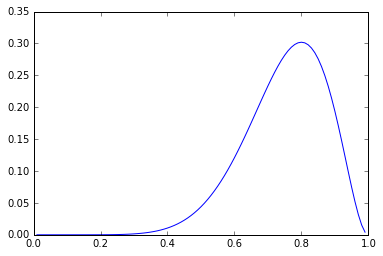

In [5]:
p = linspace(0.01, 0.99, 99)
plot(p, binom.pmf(8, 10, p));

The most likely value of p: 0.8


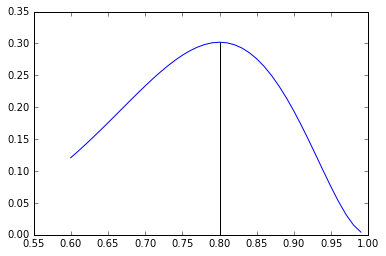

In [6]:
p = linspace(0.60, 0.99, 40)
probs = binom.pmf(8, 10, p)
plot(p, probs)

most_likely_p = p[np.argmax(probs)]
print("The most likely value of p:", most_likely_p)

vlines(x = most_likely_p, ymin = 0, ymax = binom.pmf(8, 10, most_likely_p));

The graph reaches a clear maximum. This is a value of $p$ at which the observation $X = 8$ is **MORE LIKELY** than at any other value of $p$.  

This *maximum likelihood* value of p is our **maximum likelihood estimate (MLE)**.

## The Likelihood Function

* If we look at the graph we plotted:
    * Horizontal axis: The unknown parameter $p$.
    * Vertical axis: The probability of our observation, $X = 8$, under each value of $p$.  
    

* This function is called the **likelihood function**.  


* It is a function of the unknown parameter $p$.   


* For our *fixed* observation $X = 8$, the likelihood function shows how **likely** the observation 8 is for every different value of $p$.

The likelihood function is:

$$ \begin{align*}
     L(p) &= P(X = 8) \text{ when } X \sim Binomial(10, p) \\
          &= \binom{10}{8} p^8 (1 - p)^{10 - 8} \\
          &= \binom{10}{8} p^8 (1 - p)^2
   \end{align*} $$

In general, if our observation were $X = x$ rather than $X = 8$, the likelihood function is a function of $p$ giving $P(X = x)$ when $X \sim Binomial(100, p)$.

$$ \begin{align*}
     L(p) &= P(X = x) \text{ when } X \sim Binomial(10, p) \\
          &= \binom{10}{x} p^x (1 - p)^{10 - x} 
   \end{align*} $$

### Difference between the likelihood function and the probability mass function

* The likelihood function is a probability of $x$, but it is a **FUNCTION of $p$**.  


* The likelihood gives the probability of a **FIXED** observation $x$, for every possible value of the parameter $p$.  


* The probability function gives the probability of every different value of $x$, for a **FIXED** value of $p$.

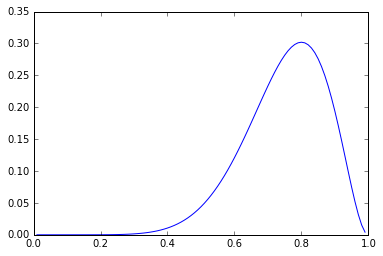

In [7]:
# Plot a likelihood function
p = linspace(0.01, 0.99, 99)
plot(p, binom.pmf(8, 10, p));

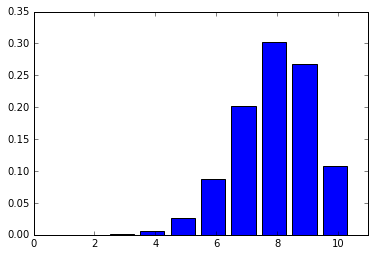

In [8]:
# Plot a probability mass function

x = linspace(0, 10, 11)
bar((x - 0.5), binom.pmf(x, 10, 0.8))
xlim((0, 11));

## Maximizing the Likelihood

We have decided that a sensible parameter estimate for p is the maximum likelihood estimate (MLE): the value of $p$ at which the observation $X = 8$ is more likely than at any other value of $p$.  

We can find the maximum likelihood estimate (MLE) using calculus.

For computational reasons, we will maximize the log of this function instead.

### The Log-likelihood Function

If we take the natural logarithm of the likelihood function, we get the **log-likelihood** function.  

$$l(p) = \log(L(p))$$

For our coin experiment,

$$ \begin{align*}
     l(p) &= L(p) \\
          &= \log\left( \binom{10}{8} p^8 (1 - p)^2 \right) \\
          &= \log \binom{10}{8} + 8 \log(p) + 2 \log(1 - p)
   \end{align*} $$

Note: The $log \binom{10}{8}$ is usually dropped since it is just a constant and does not affect the value that maximizes the function (we only care about the terms that involve $p$).

0.8 -1.19736174561


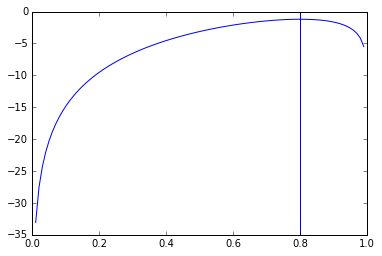

In [9]:
p = linspace(0.01, 0.99, 99)
log_likelihoods = log(binom.pmf(8, 10, p))
plot(p, log_likelihoods)

max_index = argmax(log_likelihoods)
axvline(x = p[max_index])

print(p[max_index], log_likelihoods[max_index])

In practice, we maximize the log-likehood function instead of the likelihood function because:

* The logarithm is a monotonically increasing function, meaning that the logarithm of a function achieves its maximum value at the same points as the function itself
    * e.g. the $p$ that maximizes the log-likelihood function also maximizes the likelihood, and maximizing either function gives us the MLE (they are equivalent)

* It is often easier to take the derivative of a log-likelihood function and solving for the parameter being maximized  
    * i.e. it is easier to work with sums than products

* It makes computation easier
    * one issue with calculating small probabilities with a computer is numerical underflow - once the values get sufficiently small, they will be rounded to 0 and we will lose all information

### Finding the Maximum of the Log-likelihood Function

To find the maximizing value of $p$, we first differentiate the log-likelihood with respect to $p$:

$$ \begin{align*}
     \frac{dl}{dp} &= 8 (\frac{1}{p}) + 2 (\frac{1}{1 - p}) \\
                   &= \frac{8}{p} + \frac{2}{1 - p}
   \end{align*} $$
   
The maximizing value of $p$ occurs when  

$$ \frac{dl}{dp} = 0 $$

This gives us  

$$ \frac{dl}{dp} = \frac{8}{p} - \frac{2}{1 - p} = 0 $$
$$ \Rightarrow p = 0.8 $$

So based on the data we have, we concluded that the probability of getting a head from my coin is 0.8. 


How good is this estimate?  


How to make it better?  

## A Very Brief Introduction to Bayesian Statistics

Before we carried out the experiment, did we know anything about the probability of getting a head?

We know that most of the coins are fair.  

Getting 8 heads out of 10 coin flips can be due to chance, and the coin is probably still close to fair.  

How do we incorporate this prior knowledge into our estimation?  

Answer: Go Bayesian!  

Bayesian statistics combines our knowledge and/or belief with what the data tell us to make inference about the quantity of interest.

We call the priro knowledge/belief the prior distribution: $f(p)$  

The data give us the likelihood fo $p$: $L(p)$  

Our combined information about $p$ is called the posterior distribution: $f(p | x)$  

We get the posterior by multiplying the prior and the likelihood,  

$$ f(p | x) \propto f(p) L(p) $$